### PCA

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [137]:
# df = pd.read_csv("Datasets/preprocessed_dataset.csv")
df = pd.read_csv("Datasets/new_dataset_added_column_scaled.csv")

In [138]:
df = df.drop(["Unnamed: 0","id"],axis=1)

In [139]:
df=df[df['hospital_length_of_stay']<30]

### Splitting X and y

In [140]:
from sklearn.model_selection import train_test_split
X = df.drop("hospital_length_of_stay",axis =1)
y = df['hospital_length_of_stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 782)
X_test shape: (138, 782)
y_train shape: (320,)
y_test shape: (138,)


### Implenting lasso regression to the original dataset

In [141]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # Specify the regularization parameter alpha
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 29.802823414830105


### Applying PCA to reduce to a certain dimension capturing 80 percent variance

In [142]:
pca = PCA(n_components = 28)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[ 1.69439934e+00  9.93291335e-01 -2.32032457e+00 ...  8.72357062e-01
   7.92722349e-01  1.28001609e+00]
 [-2.25822067e-02 -4.97166108e-01 -7.74930044e-01 ...  1.77542702e-01
   6.16352276e-01  5.05033986e-01]
 [ 3.20315423e-01 -1.02387137e+00 -2.69169064e-01 ...  8.23236084e-01
   8.68293110e-01  2.45058050e-01]
 ...
 [ 1.38940078e-03  1.36770810e+00 -5.60294931e+00 ...  6.29423460e-01
  -1.13933260e+00  6.93710616e-01]
 [ 3.51407676e-02 -2.04797815e+00  1.03445917e+00 ... -4.11394000e-01
   1.60502661e-01  3.13914574e-02]
 [-1.30323148e-01 -1.31146325e+00  1.56142121e+00 ... -5.78447379e-01
   4.21249755e-01  2.97289537e-01]]
(458, 28)


Total variance captured: 0.8192254433066031


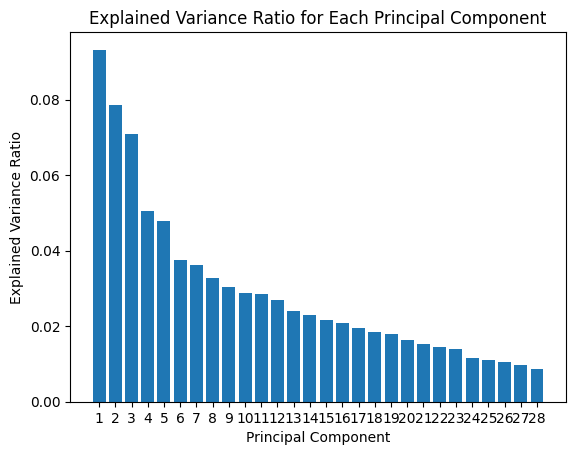

In [143]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
# print("Explained Variance Ratios for each component:")
# for i, var_ratio in enumerate(explained_variance_ratios):
#     print(f"Component {i+1}: {var_ratio}")
print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 80 percent variance captured pca components

In [144]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  # Specify the regularization parameter alpha
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 34.52791096562755
Mean Squared Error for testing: 29.531273812863308


In [145]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

#### Applying Ridge regression with alpha 1

In [146]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 34.29306394594497
Mean Squared Error test: 30.73837622156571


#### Applying ridge regression with alpha 1000

In [147]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1000)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 38.22865063433029
Mean Squared Error test: 29.23547664157195


### Applying PCA to reduce to a certain dimension capturing 85 percent variance

In [148]:
pca = PCA(n_components = 35)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[ 1.69439934e+00  9.93291335e-01 -2.32032457e+00 ...  9.29304572e-01
   6.55938295e-01  4.13210871e-02]
 [-2.25822067e-02 -4.97166108e-01 -7.74930044e-01 ...  1.10917925e+00
  -4.26970705e-01 -1.85290411e-01]
 [ 3.20315423e-01 -1.02387137e+00 -2.69169064e-01 ... -8.26478538e-01
  -1.29178923e+00 -2.52925556e-01]
 ...
 [ 1.38940079e-03  1.36770810e+00 -5.60294931e+00 ...  3.62104624e-01
  -1.21454318e-01 -4.11487109e-01]
 [ 3.51407676e-02 -2.04797815e+00  1.03445917e+00 ...  4.11532577e-01
  -6.29835251e-01  3.96581183e-01]
 [-1.30323148e-01 -1.31146325e+00  1.56142121e+00 ... -1.39845920e-01
   6.07438219e-01 -9.66660259e-01]]
(458, 35)


Total variance captured: 0.8640751347333444


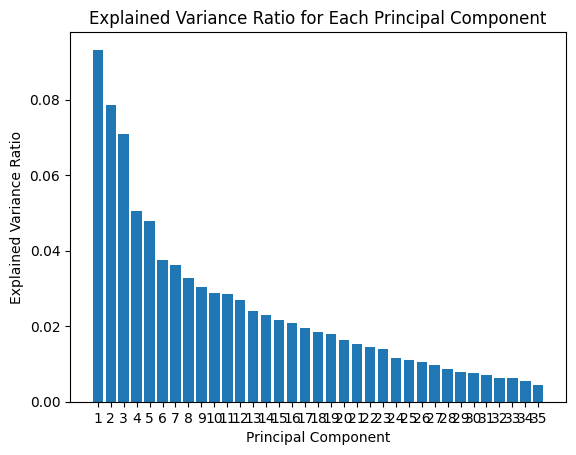

In [149]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 85 percent variance captured pca components

In [150]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 33.69974196465788
Mean Squared Error for testing: 28.79513743113505


In [151]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

#### Applying ridge regression with alpha 1

In [127]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 33.266495357218915
Mean Squared Error test: 30.704761054974362


#### Applying Ridge regression with alpha 1000

In [128]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1000)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 38.03379944262398
Mean Squared Error test: 29.15963717900463


### Applying PCA to reduce to a certain dimension capturing 90 percent variance

In [129]:
pca = PCA(n_components = 50)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape) 

[[ 1.69439934e+00  9.93291343e-01 -2.32032458e+00 ... -6.98916214e-01
   2.15732627e-01  2.73038174e-01]
 [-2.25822072e-02 -4.97166110e-01 -7.74930043e-01 ... -4.70928639e-02
  -1.02859963e-01 -1.33441363e-01]
 [ 3.20315423e-01 -1.02387137e+00 -2.69169064e-01 ...  3.62071912e-02
   9.51251877e-02  7.68233246e-02]
 ...
 [ 1.38940067e-03  1.36770810e+00 -5.60294931e+00 ...  1.30823489e-01
  -1.43274254e-02 -1.06910924e-01]
 [ 3.51407677e-02 -2.04797815e+00  1.03445917e+00 ...  2.29912497e-01
   1.51466543e-01  6.93256926e-02]
 [-1.30323148e-01 -1.31146325e+00  1.56142121e+00 ...  2.94674096e-01
  -2.55843209e-01 -2.09602651e-01]]
(458, 50)


Total variance captured: 0.9072310846468865


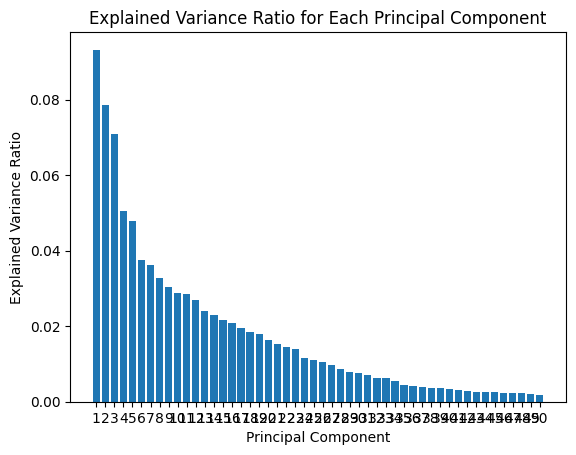

In [130]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

#### Applying lasso to the 85 percent variance captured pca components

In [131]:
# Apply Lasso Regression to the 80 variance captured pca components
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for training:", mse_train)
print("Mean Squared Error for testing:", mse_test)

Mean Squared Error for training: 31.519242883815583
Mean Squared Error for testing: 30.527657170035475


In [132]:
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

#### Applying ridge regression with alpha 1

In [134]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 30.151865651158353
Mean Squared Error test: 36.13937325795345


#### Applying ridge regression with alpha 1000

In [135]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1000)  
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
mse_y_test = mean_squared_error(y_test, y_pred_test)
mse_y_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error train:", mse_y_train)
print("Mean Squared Error test:", mse_y_test)
df_train = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_train, x='y_train', y='y_pred_train', title='y_train vs y_pred_train')
fig.update_layout(xaxis_title='y_train', yaxis_title='y_pred_train')
fig.show()

df_test = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test})

# Create a scatter plot using Plotly Express
fig = px.scatter(df_test, x='y_test', y='y_pred_test', color_discrete_sequence=['green'], title='y_test vs y_pred_test')
fig.update_layout(xaxis_title='y_test', yaxis_title='y_pred_test')
fig.show()

Mean Squared Error train: 37.76897646724916
Mean Squared Error test: 29.2353998242913
